In [17]:
from scipy.io import loadmat
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import matplotlib

import IPython
from IPython.display import Audio
import math 
from numpy.fft import fft, ifft
from numpy.linalg import inv
import sounddevice as sd
import time as time


%matplotlib inline
import matplotlib.pyplot as plt


In [10]:
sounds = loadmat('/Users/ednovate/cshw2/sounds.mat')['sounds']

test = loadmat('/Users/ednovate/cshw2//icaTest.mat')
A_test = test['A']
U_test = test['U']

print(np.shape(test['A']))
print(np.shape(test['U']))

(3, 3)
(3, 40)


In [11]:
#sounds  = np.asarray(sounds)



# ommit rewind sound
sounds  = np.asarray(sounds)
print(np.shape(sounds))

(5, 44000)


In [12]:
# Generate random matrices
#condition:
#mixed_signals >= n_source signals because the number of mixed signals cannot be less than the number of course signlas






def gradw_init(sounds, n_source_signals,mytime, mixed_signals, eta): 
    
    print(np.shape(U))

    #randomly select weights
    print("Shape of W is ")
    print(np.shape(w_init))
    print("w_init_start")
    print(w_init)

    print("shape of X")
    print(np.shape(X))

    Y = np.matmul(w_init, X)
    print(np.shape(Y))

    Z = np.zeros((n_source_signals, mytime))


    for i in range(n_source_signals):
        for j in range(mytime):
           Z[i,j] = 1/(1+math.exp(-(Y[i,j])))   

    print("the shape of Z is ")
    print(np.shape(Z))
    print(Z) 
    dynamic_identity_matrix = np.identity(n_source_signals)

    one_minus_2z_matrix = np.zeros((n_source_signals, mytime))


    for i in range(n_source_signals):
        for j in range(mytime):
            one_minus_2z_matrix[i,j] = 1-2*Z[i,j] 

    print("shape of one_minus_2z_matrix ")
    print(np.shape(one_minus_2z_matrix))



    intermed_result_one = np.matmul(one_minus_2z_matrix, Y.T)

    intermed_result_two = np.matmul((dynamic_identity_matrix + intermed_result_one),w_init) 

    grad_w = eta* intermed_result_two

    print("gradw")
    print(np.shape(grad_w))


    print("intermed ")
    print(np.shape(intermed_result_one))

    w_new = w_init + grad_w
    print("w _init new")
    print(w_new)
    return w_new
    

    
    
def grad_update(previous_weights):
   
    Y = np.matmul(previous_weights, X)
    #print("shape of Y is")
    #print(np.shape(Y))

    Z = np.zeros((n_source_signals, mytime))
    #print("Z shape is")
    #print(np.shape(Z))

    for i in range(n_source_signals):
        for j in range(mytime):
           Z[i,j] = 1/(1+math.exp(-(Y[i,j])))   

    
    x,y = np.shape(previous_weights)
    
    one_minus_2z_matrix = np.zeros((n_source_signals, mytime))
    dynamic_identity_matrix = np.identity(x)
    
    intermed_result_one = np.matmul(one_minus_2z_matrix, Y.T)
    intermed_result_two = np.matmul((dynamic_identity_matrix + intermed_result_one),previous_weights) 

    grad_w = eta* intermed_result_two

    #print("gradw")
    #print(np.shape(grad_w))


    #print("intermed ")
    #print(np.shape(intermed_result_one))

    w_new = w_init + grad_w
    #print("w _init new")
   # print(w_new)
    return w_new
    



In [ ]:



%%time

eta = 0.01
n_source_signals = 5
mytime = 44000
mixed_signals = 5
iterations = 10000

a_weights = np.random.rand(mixed_signals, n_source_signals)

U = sounds[0:n_source_signals, 0:mytime ]
print(np.shape(U))

#a_weights = np.random.rand(mixed_signals, n_source_signals)
w_init = np.random.uniform( low = 0, high = 0.01, size =(n_source_signals, mixed_signals))
X = np.matmul(a_weights, U)




grad_init = gradw_init(sounds, n_source_signals,mytime, mixed_signals, eta)



##iterate through different iteration numbers, in increments of 5 iterations. 


#containers for holding elpased time per cycle number of iterations
x_iterations = []
y_time = []

start = time.time() 
for i in range(iterations ):
    
    if (i<=iterations +1):
        

        grad_new = grad_update(grad_init)
        grad_next = grad_update(grad_new)
        i+= 1
        print( "iteration: " + str(i-1))
        #print(grad_next)
        #record time elapsed per each iteration value, for later plotting
   
    end = time.time()
    end_time = ()
    x_iterations.append(i-1)
    time_elapsed = (end - start)
    time_elapsed = round(time_elapsed, 5)
    y_time.append(time_elapsed)
    print("Time:" + str(time_elapsed) + ' seconds') 




(5, 44000)
(5, 44000)
Shape of W is 
(5, 5)
w_init_start
[[0.00622395 0.0098673  0.00407325 0.00302278 0.00377122]
 [0.00601374 0.0027699  0.00552576 0.00243082 0.00625823]
 [0.00081932 0.0053482  0.00697143 0.00091639 0.00110325]
 [0.00627022 0.00143927 0.00686342 0.0037275  0.00307685]
 [0.0016508  0.00669557 0.00297661 0.00850295 0.00995763]]
shape of X
(5, 44000)
(5, 44000)
the shape of Z is 
(5, 44000)
[[0.49983208 0.49979623 0.49988917 ... 0.50027477 0.50020381 0.49993315]
 [0.49983463 0.49979939 0.49989291 ... 0.50026706 0.50020244 0.49993085]
 [0.4998859  0.49985573 0.49992184 ... 0.50017861 0.50013658 0.49995262]
 [0.49985162 0.49982186 0.49990214 ... 0.50024267 0.50018038 0.49994059]
 [0.4997736  0.49971472 0.49985111 ... 0.50035845 0.50027503 0.49990403]]
shape of one_minus_2z_matrix 
(5, 44000)
gradw
(5, 5)
intermed 
(5, 5)
w _init new
[[0.00622278 0.00989111 0.0040425  0.00299574 0.00373467]
 [0.00601388 0.00272677 0.00551342 0.00240079 0.0062503 ]
 [0.00079416 0.00536212 

[[1.73056264e-03 5.94977091e-03 6.83167229e-03 9.72681334e-03
  6.53802670e-03]
 [3.10631211e-04 7.58756945e-03 1.38622046e-03 8.26265868e-04
  3.23720589e-03]
 [3.82166642e-03 4.96276675e-05 5.36478172e-03 4.19599996e-03
  8.85833860e-03]
 [7.32002685e-03 8.23756657e-03 5.27558631e-03 6.45616038e-03
  3.25821293e-03]
 [6.24937522e-03 5.78953534e-03 2.74574430e-03 3.33883490e-03
  6.65009685e-03]]
(5, 5)


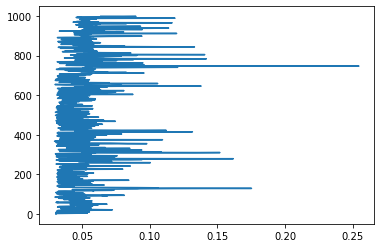

In [18]:
print(grad_next)
print(np.shape(grad_next))

matplotlib.pyplot.plot(x_iterations,y_time)


In [34]:
##obtained using TACC machine, ~3 hrs

#Using only 4400 ms, 100000 iterations, ~3 hrs, computation time, sounds[0,:] rewind dominating
#grad_next =np.array([[13.02136035, -7.6164252,  -2.82834422,  2.06369931],
#[-6.51265598 , 5.19997596 , 1.07005952, -1.65562518],
#[-5.81916133 , 3.52857407 , 1.07264337 , 0.12980029],
#[-0.39150559 ,-0.85093311 , 1.40374636 , 0.10206021]])
    
 
#Using full clip(44000 ms), 100000 iterations,  ~10 hours computation time, sounds[0,:] rewind dominating
#grad_next = np.array([[-5.07912502e+00,  8.98060919e-01,  8.19605654e+00,  8.66326498e+00,
#  -7.76413022e+00],
# [ 3.84924709e+00,  2.42817466e-01, -3.15048606e+00, -1.97667078e+00,
 #  9.64245244e-03],
# [ 7.26738637e+00 , 2.54436869e-01, -1.29200312e+01, -1.52624957e+01,
#   1.29289554e+01],
# [-2.61734588e+00, -7.31362749e-01,  4.08524504e+00,  1.60339033e+00,
#  -2.83482447e-01],
# [-3.58663240e+00,  5.18839892e-02,  4.65021663e+00,  7.27517126e+00,
#  -4.49540807e+00]])


# Omitting rewind sound(row 0), full clip, 10000 iterations, drill sound dominating 
grad_next = np.array([[ 0.88590911,  1.43401302, -0.39872688, -1.73149922],
 [ 0.13755381,  3.59189602, -2.38011818, -1.48655601],
 [-1.60357669,  1.19800977,  0.5333129,  -0.10265903],
 [ 1.05174644, -7.71781405,  3.72607693,  5.07750911]])



In [79]:
sound_matrix = np.matmul(grad_next,sounds)
print(np.shape(sound_matrix))

(4, 44000)


In [80]:
# This is the one that is dominating
fs = 44000
sd.play(sound_matrix[0,:],fs)

In [81]:
sd.play(sound_matrix[1,:],fs)


In [82]:

sd.play(sound_matrix[2,:],fs)


In [83]:
sd.play(sound_matrix[3,:],fs)


In [76]:
sd.play(sounds[0,:], fs)

In [63]:
sd.play(sounds[1,:], fs)

In [64]:
sd.play(sounds[2,:], fs)

In [65]:
sd.play(sounds[3,:], fs)

In [66]:
sd.play(sounds[4,:], fs)